In [1]:
## test my implementation against POT 
import torch 
import sys
sys.path.insert(1, '/Users/arijitsehanobish/efficient_graph_algorithms/src')
from entropic_regularized_wasserstein import SinkhornDistance
import numpy as np
import seaborn as sns
import matplotlib.pylab as pl
import ot
import ot.plot

In [2]:
# generate data and set up the problem
n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt) #pairwise Euclidean distance matrix

Text(0.5, 1.0, 'Cost matrix M')

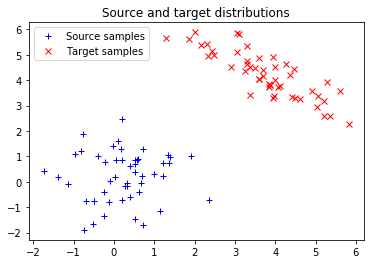

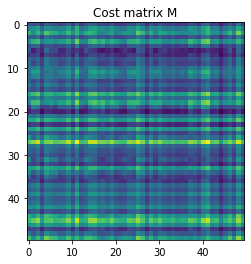

In [3]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

In [4]:
### use POT to get the coupling matrix
lambd = 1e-1

Gs = ot.sinkhorn(a, b, M, lambd, numItermax=50000)

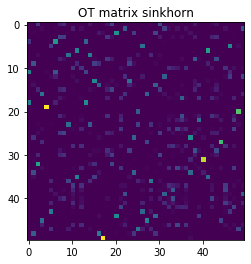

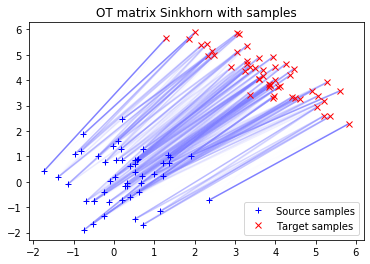

In [5]:
## show the transport plan

pl.figure(5)
pl.imshow(Gs, interpolation='nearest')
pl.title('OT matrix sinkhorn')

pl.figure(6)
ot.plot.plot2D_samples_mat(xs, xt, Gs, color=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix Sinkhorn with samples')

pl.show()

In [6]:
sinkhorn = SinkhornDistance(eps=0.1, max_iter=100, reduction=None)

In [7]:
cost, pi, C = sinkhorn(torch.from_numpy(xs), torch.from_numpy(xt))

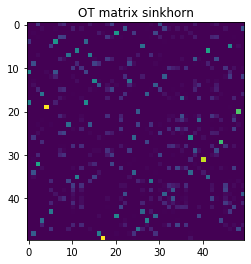

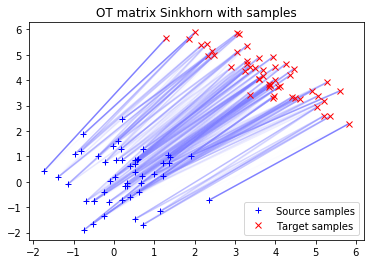

In [8]:
## test my transport matrix

pl.figure(5)
pl.imshow(pi.numpy(), interpolation='nearest')
pl.title('OT matrix sinkhorn')

pl.figure(6)
ot.plot.plot2D_samples_mat(xs, xt, pi.numpy(), color=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix Sinkhorn with samples')

pl.show()

In [9]:
## calculate the L2 norm between the 2 matrices
((Gs-pi.numpy())**2).sum()

3.6135755796259015e-06